# BANK MARKETING CLASSIFICATION

# Importing Dependencies

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pylab
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (3, 3)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Reading the Dataset

In [0]:
df = pd.read_csv('bank_full.csv', sep= ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
df.shape

(45211, 17)

In [0]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [0]:
df1 = df[df['y']=='yes']
df1.reset_index(drop=True)
df11=df1.drop(df1.index[0:2645])



In [0]:
df2 = df[df['y']=='no']
df2.reset_index(drop=True)
df22=df2.drop(df2.index[0:19961])

In [0]:
frames = [df11, df22]
frames

[       age          job   marital  education  ... pdays  previous poutcome    y
 38690   51   management    single   tertiary  ...   375         1  failure  yes
 38694   34     services  divorced  secondary  ...    -1         0  unknown  yes
 38697   35   technician    single   tertiary  ...    -1         0  unknown  yes
 38712   56  blue-collar   married    primary  ...    -1         0  unknown  yes
 38725   35  blue-collar   married  secondary  ...   312         1  failure  yes
 ...    ...          ...       ...        ...  ...   ...       ...      ...  ...
 45204   73      retired   married  secondary  ...    40         8  failure  yes
 45205   25   technician    single  secondary  ...    -1         0  unknown  yes
 45206   51   technician   married   tertiary  ...    -1         0  unknown  yes
 45207   71      retired  divorced    primary  ...    -1         0  unknown  yes
 45208   72      retired   married  secondary  ...   184         3  success  yes
 
 [2644 rows x 17 columns],

In [0]:
result = pd.concat(frames)
result.reset_index(drop=True)
result.head()    

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
38690,51,management,single,tertiary,no,297,yes,no,cellular,15,may,415,4,375,1,failure,yes
38694,34,services,divorced,secondary,no,89,yes,no,cellular,15,may,1871,4,-1,0,unknown,yes
38697,35,technician,single,tertiary,no,13460,yes,no,cellular,15,may,1068,3,-1,0,unknown,yes
38712,56,blue-collar,married,primary,no,827,yes,no,telephone,15,may,462,4,-1,0,unknown,yes
38725,35,blue-collar,married,secondary,no,205,yes,yes,cellular,15,may,1313,7,312,1,failure,yes


In [0]:
result=result.reset_index(drop=True)
result.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,51,management,single,tertiary,no,297,yes,no,cellular,15,may,415,4,375,1,failure,yes
1,34,services,divorced,secondary,no,89,yes,no,cellular,15,may,1871,4,-1,0,unknown,yes
2,35,technician,single,tertiary,no,13460,yes,no,cellular,15,may,1068,3,-1,0,unknown,yes
3,56,blue-collar,married,primary,no,827,yes,no,telephone,15,may,462,4,-1,0,unknown,yes
4,35,blue-collar,married,secondary,no,205,yes,yes,cellular,15,may,1313,7,312,1,failure,yes


In [0]:
df=result
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,51,management,single,tertiary,no,297,yes,no,cellular,15,may,415,4,375,1,failure,yes
1,34,services,divorced,secondary,no,89,yes,no,cellular,15,may,1871,4,-1,0,unknown,yes
2,35,technician,single,tertiary,no,13460,yes,no,cellular,15,may,1068,3,-1,0,unknown,yes
3,56,blue-collar,married,primary,no,827,yes,no,telephone,15,may,462,4,-1,0,unknown,yes
4,35,blue-collar,married,secondary,no,205,yes,yes,cellular,15,may,1313,7,312,1,failure,yes


In [0]:
df.shape

(22605, 17)

In [0]:
df['y'].value_counts()  

no     19961
yes     2644
Name: y, dtype: int64

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,22605.0,40.892634,11.437915,18.0,32.0,38.0,48.0,95.0
balance,22605.0,1544.581243,3360.477059,-4057.0,115.0,527.0,1615.0,102127.0
day,22605.0,15.659500,8.098311,1.0,8.0,17.0,21.0,31.0
duration,22605.0,233.107587,219.686803,0.0,99.0,173.0,295.0,4918.0
campaign,22605.0,2.503384,2.524215,1.0,1.0,2.0,3.0,38.0
pdays,22605.0,77.982084,127.597172,-1.0,-1.0,-1.0,151.0,871.0
previous,22605.0,1.113692,3.100238,0.0,0.0,0.0,1.0,275.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22605 entries, 0 to 22604
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        22605 non-null  int64 
 1   job        22605 non-null  object
 2   marital    22605 non-null  object
 3   education  22605 non-null  object
 4   default    22605 non-null  object
 5   balance    22605 non-null  int64 
 6   housing    22605 non-null  object
 7   loan       22605 non-null  object
 8   contact    22605 non-null  object
 9   day        22605 non-null  int64 
 10  month      22605 non-null  object
 11  duration   22605 non-null  int64 
 12  campaign   22605 non-null  int64 
 13  pdays      22605 non-null  int64 
 14  previous   22605 non-null  int64 
 15  poutcome   22605 non-null  object
 16  y          22605 non-null  object
dtypes: int64(7), object(10)
memory usage: 2.9+ MB


In [0]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [0]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,22605.000000,22605,22605,22605,22605,22605.000000,22605,22605,22605,22605.000000,22605,22605.000000,22605.000000,22605.000000,22605.000000,22605,22605
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,5222,13010,11276,22330,NaN,11495,19693,20342,NaN,5434,NaN,NaN,NaN,NaN,14707,19961
mean,40.892634,NaN,NaN,NaN,NaN,1544.581243,NaN,NaN,NaN,15.659500,NaN,233.107587,2.503384,77.982084,1.113692,NaN,NaN
std,11.437915,NaN,NaN,NaN,NaN,3360.477059,NaN,NaN,NaN,8.098311,NaN,219.686803,2.524215,127.597172,3.100238,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-4057.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,115.000000,NaN,NaN,NaN,8.000000,NaN,99.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,527.000000,NaN,NaN,NaN,17.000000,NaN,173.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1615.000000,NaN,NaN,NaN,21.000000,NaN,295.000000,3.000000,151.000000,1.000000,NaN,NaN


In [0]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [0]:
df['marital'].sample(n=5) #n=10

1032     single
6979     single
2199    married
6041    married
6295    married
Name: marital, dtype: object

In [0]:
cat_val = ["job", "marital", "education", "default","housing", "loan", "contact", "month", "poutcome"]

for col in cat_val:
    print ([col]," :","\n", df[col].value_counts())
    print()

['job']  : 
 management       5222
blue-collar      4048
technician       3927
admin.           2599
services         1834
retired          1309
self-employed     843
unemployed        768
student           730
entrepreneur      689
housemaid         522
unknown           114
Name: job, dtype: int64

['marital']  : 
 married     13010
single       7130
divorced     2465
Name: marital, dtype: int64

['education']  : 
 secondary    11276
tertiary      7570
primary       2897
unknown        862
Name: education, dtype: int64

['default']  : 
 no     22330
yes      275
Name: default, dtype: int64

['housing']  : 
 yes    11495
no     11110
Name: housing, dtype: int64

['loan']  : 
 no     19693
yes     2912
Name: loan, dtype: int64

['contact']  : 
 cellular     20342
telephone     1956
unknown        307
Name: contact, dtype: int64

['month']  : 
 may    5434
aug    3978
nov    3750
apr    2481
feb    2394
jan    1365
jun     855
oct     689
sep     579
jul     515
mar     352
dec     213


In [0]:
df['marital'].sample(frac=0.1, random_state=1) #frac=0.1 means 10%

5543      married
16319     married
15789     married
9290     divorced
275       married
           ...   
6974       single
5002      married
19390    divorced
5218     divorced
20674    divorced
Name: marital, Length: 2260, dtype: object

**AS OUR DATASET HAS NO NULL VALUES, WE RANDOMLY REMOVE SOME VALUE FROM RANDOM COLUMN TO PERFORM DATA PREPROCESSING.**

In [0]:
col_num=[3,4,5]
column=['marital', 'education', 'loan']
deleted_list=[]
col_name=[]
num=0
while True:
    col=np.random.randint(low=3,high=8)
    #print(col)
    for i in range(len(col_num)):
        if col_num[i]==col:
            col_name=column[i]
    #print(col,col_name)
    row=np.random.randint(low=1,high=22605)
    deleted=str(row)+'x'+str(col)
    if deleted in deleted_list:
        continue
    else:
        #df.iloc[row][col]=np.nan
        df[col_name][row]=np.nan
        deleted_list.append(deleted)
    print(deleted_list)
    num=num+1
    if num==20000:
        break


In [0]:
df.isnull().sum()

age             0
job             0
marital      6113
education    6082
default         0
balance         0
housing         0
loan         6179
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

In [0]:
df.marital.mode()

0    married
dtype: object

In [0]:
df.marital = df.marital.fillna('married')

In [0]:
df.education.mode()

0    secondary
dtype: object

In [0]:
df.education=df.education.fillna('secondary')

In [0]:
df.loan.mode()

0    no
dtype: object

In [0]:
df.loan=df.loan.fillna('no')

In [0]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22605 entries, 0 to 22604
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        22605 non-null  int64 
 1   job        22605 non-null  object
 2   marital    22605 non-null  object
 3   education  22605 non-null  object
 4   default    22605 non-null  object
 5   balance    22605 non-null  int64 
 6   housing    22605 non-null  object
 7   loan       22605 non-null  object
 8   contact    22605 non-null  object
 9   day        22605 non-null  int64 
 10  month      22605 non-null  object
 11  duration   22605 non-null  int64 
 12  campaign   22605 non-null  int64 
 13  pdays      22605 non-null  int64 
 14  previous   22605 non-null  int64 
 15  poutcome   22605 non-null  object
 16  y          22605 non-null  object
dtypes: int64(7), object(10)
memory usage: 2.9+ MB


In [0]:
df.groupby('y').mean().T

y,no,yes
age,40.586343,43.204992
balance,1477.669756,2049.732602
day,15.830570,14.368003
duration,215.054406,369.400908
campaign,2.596112,1.803328
pdays,73.842743,109.232224
previous,1.004308,1.939486


In [0]:
df.groupby('job').mean().T

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,39.152366,39.923172,41.850508,47.126437,40.160092,65.281895,40.310795,38.512541,26.102740,38.724472,40.533854,48.570175
balance,1232.000385,1230.884881,1635.227866,1526.047893,1939.347376,2331.575248,1906.079478,1181.044166,1454.904110,1317.399796,1831.536458,1869.350877
day,14.907657,14.784585,14.950653,16.867816,16.311949,15.548510,16.189798,14.816249,14.435616,16.934556,14.384115,16.157895
duration,218.687957,234.601532,224.705370,227.856322,225.444083,294.048892,232.529063,231.474918,235.521918,225.693405,269.904948,257.500000
campaign,2.135437,2.458004,2.361393,2.655172,2.679242,2.122995,2.616845,2.352781,2.126027,2.871658,2.118490,2.885965
pdays,90.809157,103.487895,67.986938,51.017241,67.440444,64.145913,62.489917,91.107415,72.378082,70.564553,56.132812,47.500000
previous,1.273182,1.168478,0.960813,0.867816,1.162581,1.088617,0.988138,1.063250,1.182192,1.073593,0.761719,0.684211


In [0]:
df.groupby('marital').mean().T

marital,divorced,married,single
age,46.556736,42.832725,33.130785
balance,1314.923980,1630.787943,1365.064529
day,15.478480,15.745660,15.463415
duration,232.826719,232.891217,233.852698
campaign,2.367244,2.565443,2.364125
pdays,84.556736,77.393363,77.487997
previous,1.088317,1.125761,1.086230


In [0]:
df.groupby('education').mean().T

education,primary,secondary,tertiary,unknown
age,47.278918,40.389028,39.354444,43.974843
balance,1453.826493,1423.216715,1884.455375,1660.152516
day,15.285914,15.524258,16.172659,15.548742
duration,241.628265,231.171128,233.044716,248.605346
campaign,2.529384,2.475185,2.600840,2.212264
pdays,83.135261,81.332915,66.878262,80.683962
previous,1.070429,1.118430,1.122833,1.073899


# Exploratory Data Analysis and  Visualization

Ratio of classes (no : yes) 0.8830347268303472 : 0.11696527316965273


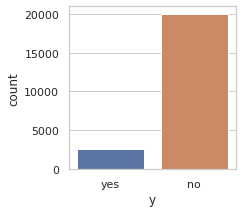

In [0]:
ratio = df.y[df.y == "yes"].count() / df.y.shape[0]
print('Ratio of classes (no : yes)', 1- ratio, ':', ratio)
sns.countplot(df.y)
plt.show()

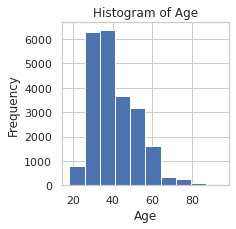

In [0]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

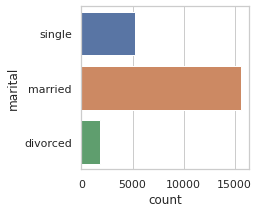

In [0]:
sns.countplot(y = df.marital, data = df)
plt.show()

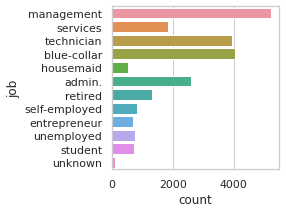

In [0]:
sns.countplot(y = df.job, data = df)
plt.show()

# Looking for interesting facts

In [0]:
print('Max age: ', df['age'].max())
print('Min age: ', df['age'].min())
print('Null Values: ', df['age'].isnull().any())
print('Mean age: ', df['age'].mean())

Min age:  95
Max age:  18
Null Values:  False
Mean age:  40.892634372926345


In [0]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Ratio of classes (no : yes) 0.8830347268303472 : 0.11696527316965273


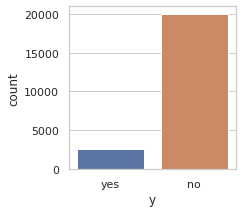

In [0]:
ratio = df.y[df.y == "yes"].count() / df.y.shape[0]
print('Ratio of classes (no : yes)', 1- ratio, ':', ratio)
sns.countplot(df.y)
plt.show()

In [0]:
# lets get some more understanding of data and relationships
print('check 1: ', df.groupby(['loan','y']).size())
print('\n\ncheck 2: ', df.groupby(['job','y']).size())
print('\n\ncheck 3: ', df.groupby(['marital','y']).size())
print('\n\ncheck 4: ', df.groupby(['education','y']).size())
print('\n\ncheck 5: ', df.groupby(['poutcome','y']).size())
print('\n\ncheck 6: ', df.groupby(['month','y']).size())
print('\n\ncheck 7: ', df.groupby(['y', 'default']).size())

check 1:  loan  y  
no    no     17955
      yes     2544
yes   no      2006
      yes      100
dtype: int64


check 2:  job            y  
admin.         no     2280
               yes     319
blue-collar    no     3840
               yes     208
entrepreneur   no      651
               yes      38
housemaid      no      463
               yes      59
management     no     4538
               yes     684
retired        no      938
               yes     371
self-employed  no      760
               yes      83
services       no     1684
               yes     150
student        no      527
               yes     203
technician     no     3529
               yes     398
unemployed     no      654
               yes     114
unknown        no       97
               yes      17
dtype: int64


check 3:  marital   y  
divorced  no      1604
          yes      185
married   no     13897
          yes     1712
single    no      4460
          yes      747
dtype: int64


check 4:  education 

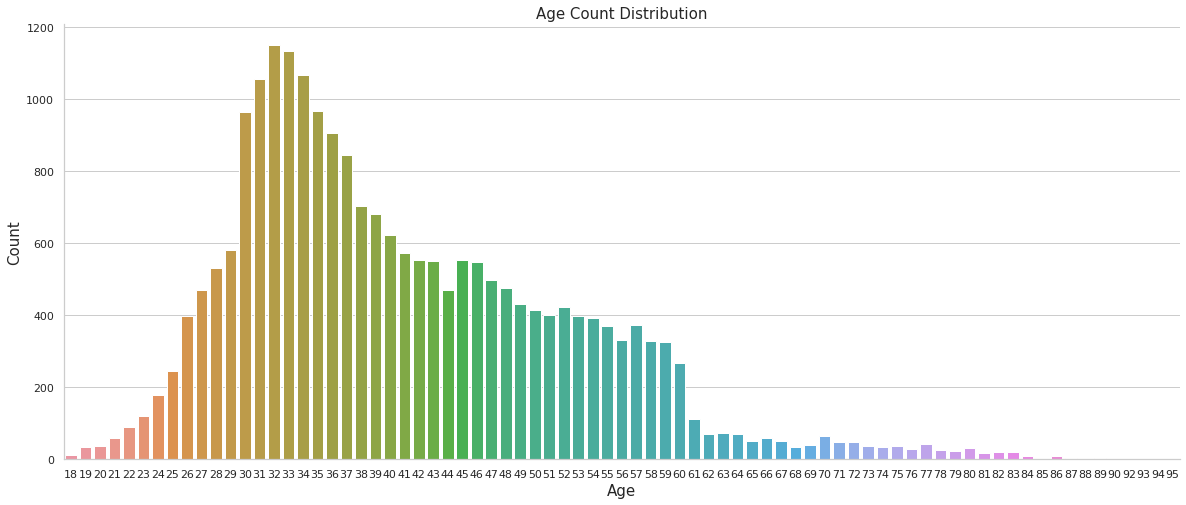

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df.iloc[: , 0:7])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

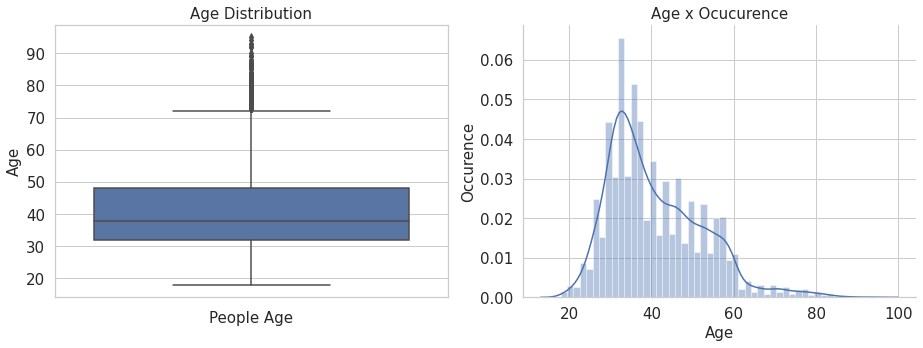

In [0]:
import warnings
warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

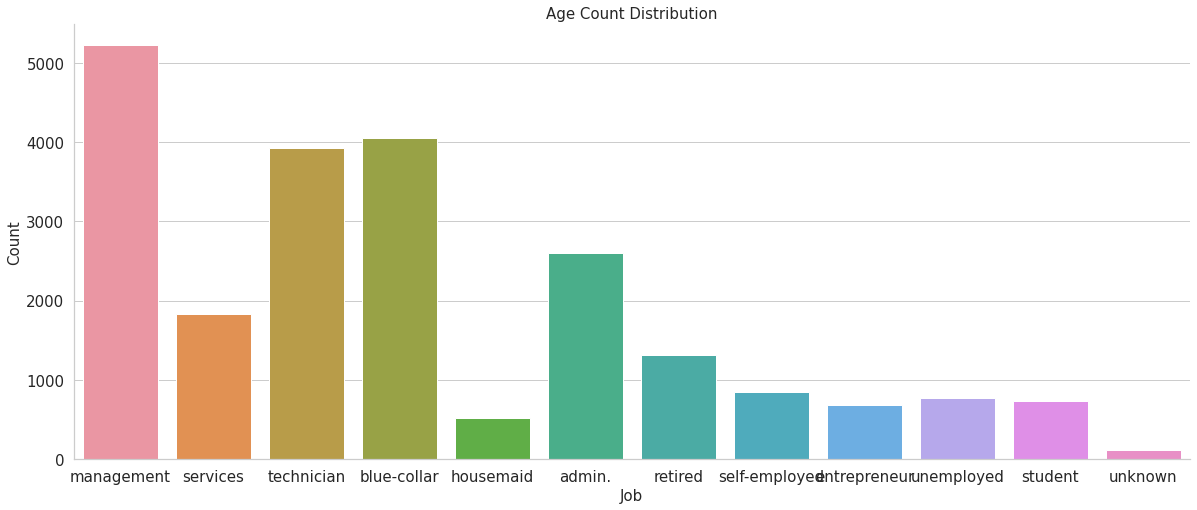

In [0]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x ='job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

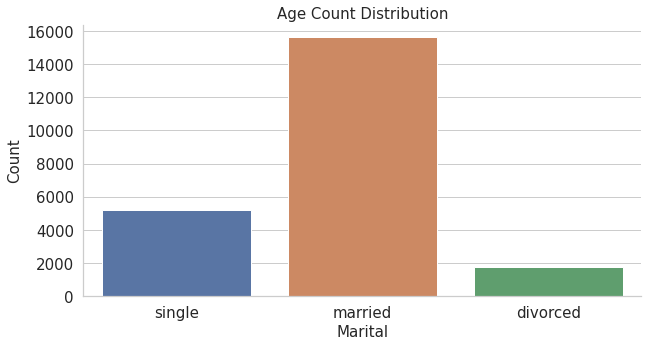

In [0]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x ='marital', data = df)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

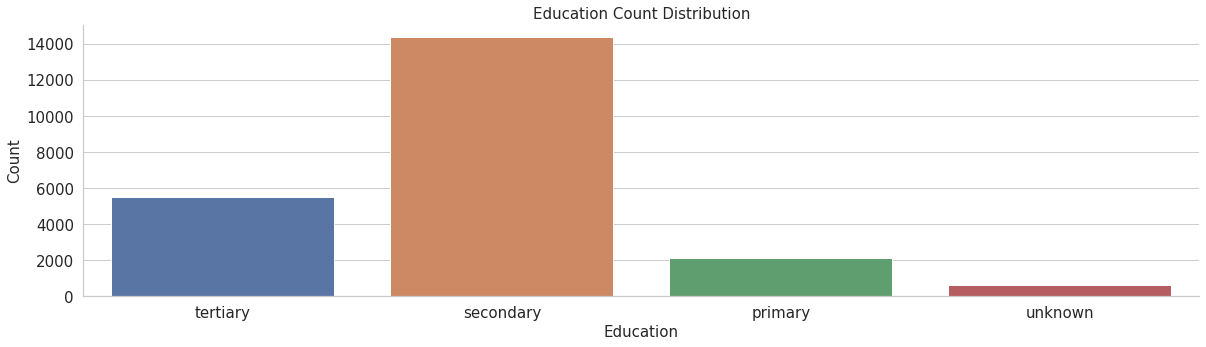

In [0]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x ='education', data = df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

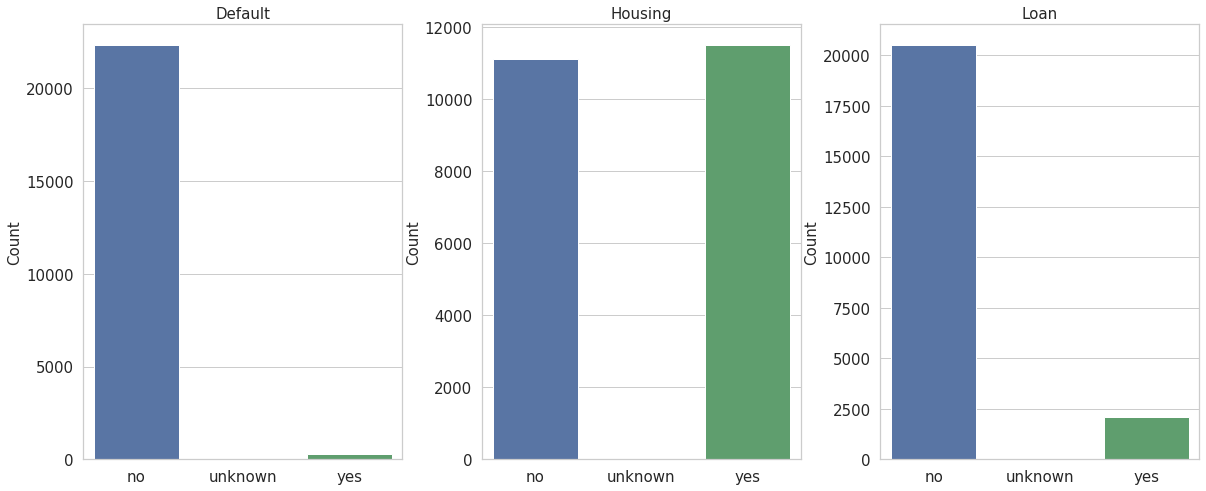

In [0]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = df, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

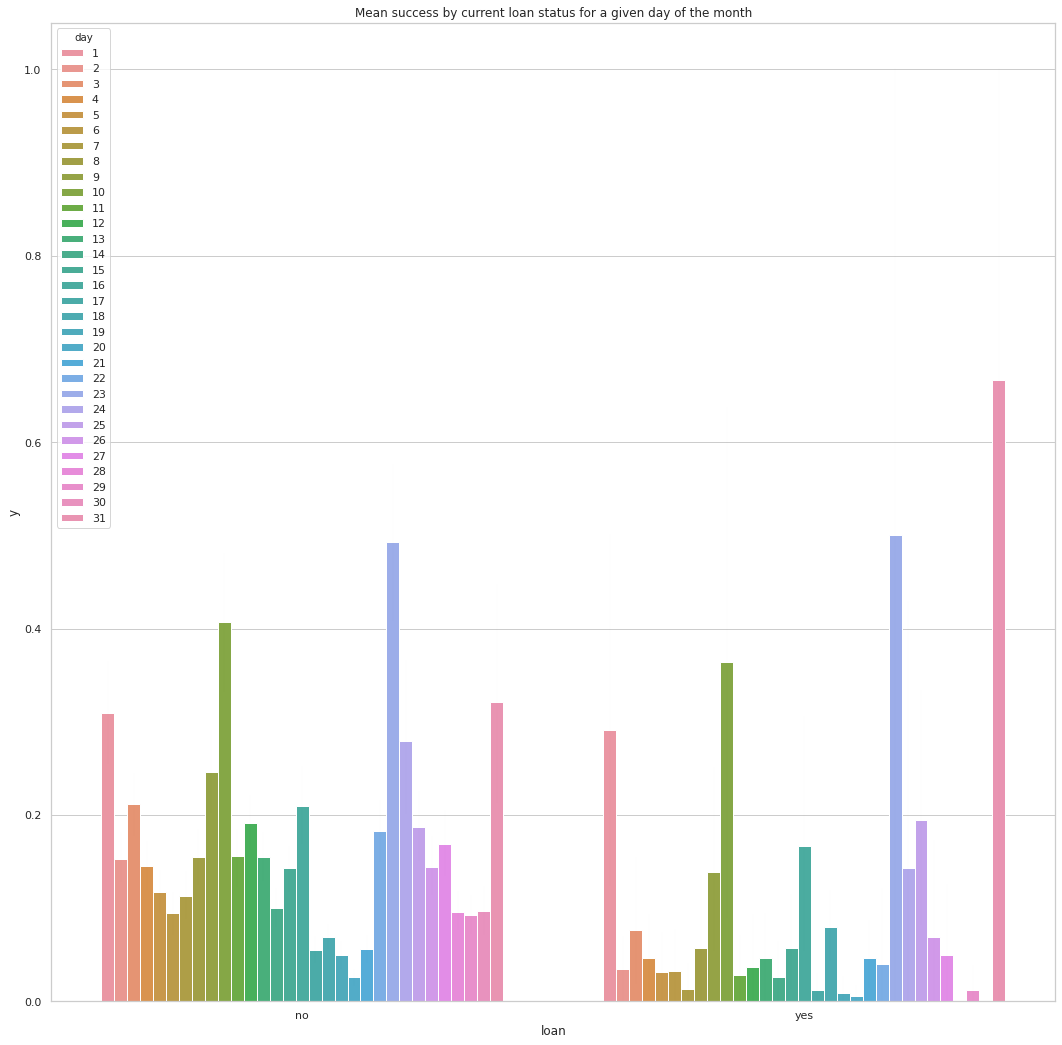

In [0]:
#Label Encoding the class attribute
label_encoder = LabelEncoder()
label_encoder.fit(df["y"])
df["y"] = label_encoder.transform(df["y"])

pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'loan', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
plt.title('Mean success by current loan status for a given day of the month')
plt.show()

# Feature Engineering

# Creating some categorical Attributes

In [0]:
df['bal_sign'] = pd.Series(df['balance'] > 0)

# Label Encoding the Binary Attributes

In [0]:
labels = ['housing', 'default', 'loan']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])

In [0]:

cols = ['job', 'contact', 'marital','education', 'poutcome', 'month', 'day']
for label in cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])

In [0]:
df_corr = df.corr()

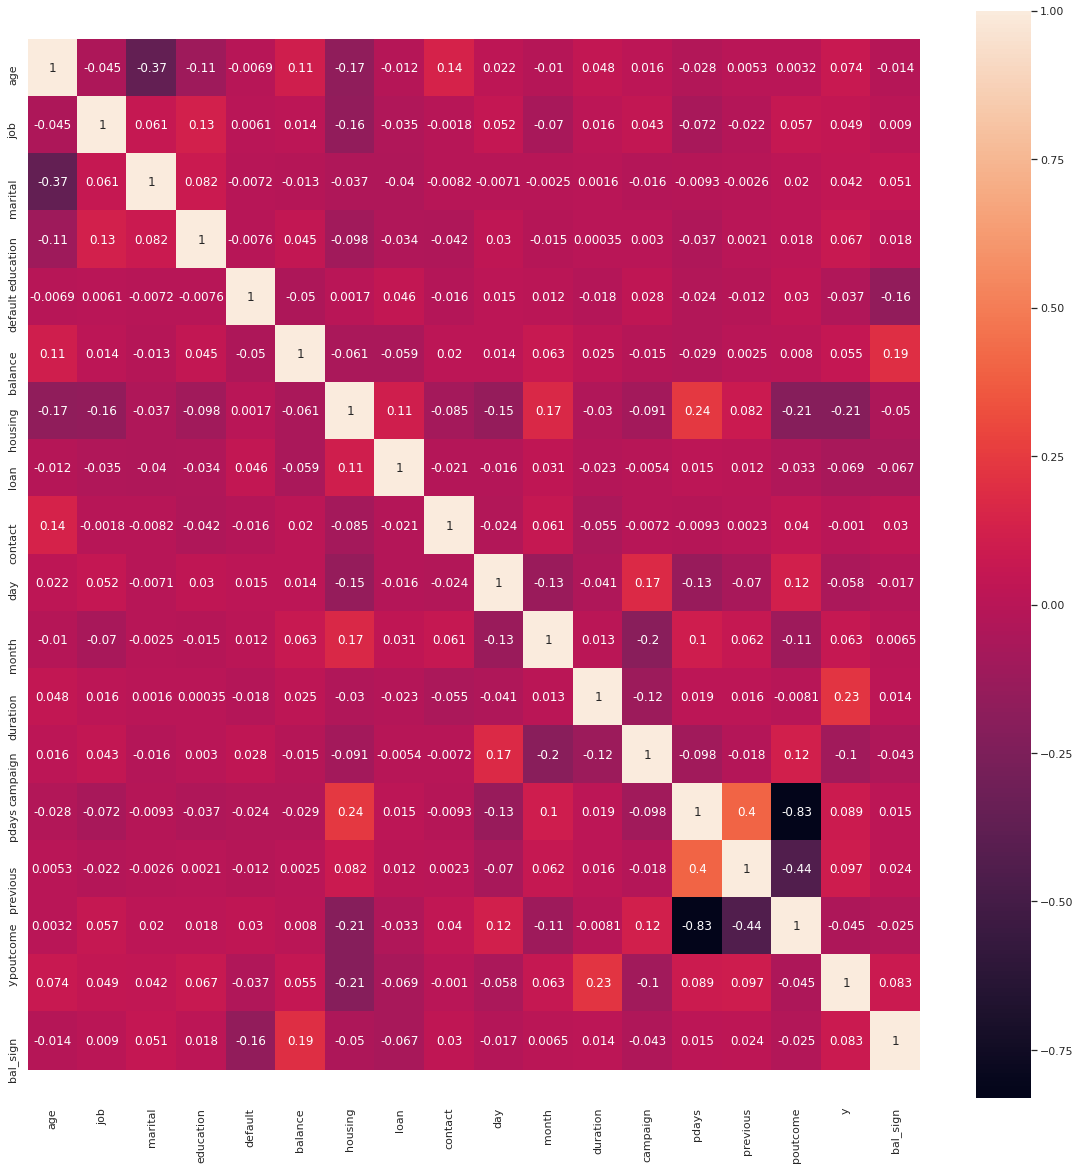

In [0]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(df_corr, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- From the above plot we can observe that most of the features are independent of each other.
- Feature-pair (pdays - previous) is highly negatively correlated.
- Therefore we can remove "pdays"

In [0]:
final_df = df.drop(["pdays"], axis = 1)

In [0]:
df_corr = final_df.corr()

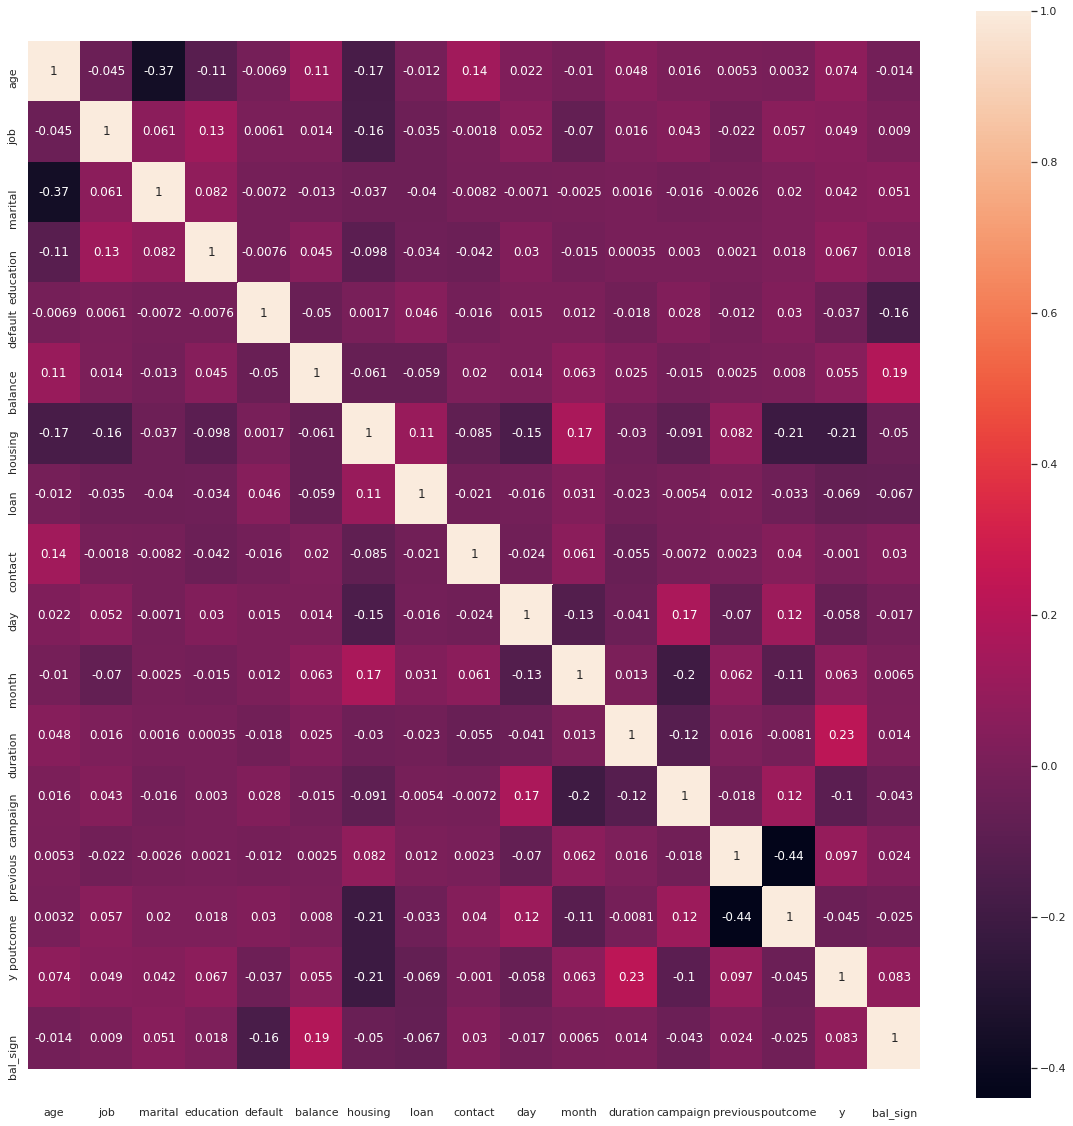

In [0]:
plt.figure(figsize=(20, 20))
ax=sns.heatmap(df_corr, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [0]:
# ONE HOT ENCODING : 
df = pd.get_dummies(df, columns = cols)

In [0]:
df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,bal_sign,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,contact_0,contact_1,contact_2,marital_0,marital_1,marital_2,education_0,education_1,education_2,education_3,poutcome_0,poutcome_1,poutcome_2,poutcome_3,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,day_0,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30
0,51,0,297,1,0,415,4,375,1,1,True,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34,0,89,1,0,1871,4,-1,0,1,True,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35,0,13460,1,0,1068,3,-1,0,1,True,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,56,0,827,1,0,462,4,-1,0,1,True,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35,0,205,1,1,1313,7,312,1,1,True,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22605 entries, 0 to 22604
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          22605 non-null  int64
 1   default      22605 non-null  int64
 2   balance      22605 non-null  int64
 3   housing      22605 non-null  int64
 4   loan         22605 non-null  int64
 5   duration     22605 non-null  int64
 6   campaign     22605 non-null  int64
 7   pdays        22605 non-null  int64
 8   previous     22605 non-null  int64
 9   y            22605 non-null  int64
 10  bal_sign     22605 non-null  bool 
 11  job_0        22605 non-null  uint8
 12  job_1        22605 non-null  uint8
 13  job_2        22605 non-null  uint8
 14  job_3        22605 non-null  uint8
 15  job_4        22605 non-null  uint8
 16  job_5        22605 non-null  uint8
 17  job_6        22605 non-null  uint8
 18  job_7        22605 non-null  uint8
 19  job_8        22605 non-null  uint8
 20  job_9 

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,22605.0,40.892634,11.437915,18.0,32.0,38.0,48.0,95.0
default,22605.0,0.012165,0.109627,0.0,0.0,0.0,0.0,1.0
balance,22605.0,1544.581243,3360.477059,-4057.0,115.0,527.0,1615.0,102127.0
housing,22605.0,0.508516,0.499939,0.0,0.0,1.0,1.0,1.0
loan,22605.0,0.093165,0.290670,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
day_26,22605.0,0.023269,0.150761,0.0,0.0,0.0,0.0,1.0
day_27,22605.0,0.041584,0.199640,0.0,0.0,0.0,0.0,1.0
day_28,22605.0,0.041186,0.198724,0.0,0.0,0.0,0.0,1.0
day_29,22605.0,0.023402,0.151180,0.0,0.0,0.0,0.0,1.0


In [0]:
#Label Encoding the class attribute
from sklearn.preprocessing import MinMaxScaler
labels = df.y
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(df.drop(['y'], axis = 1)), columns = df.drop(['y'], axis = 1).columns)

In [0]:
fraud=df[df['y']=="yes"]

In [0]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          0 non-null      int64
 1   default      0 non-null      int64
 2   balance      0 non-null      int64
 3   housing      0 non-null      int64
 4   loan         0 non-null      int64
 5   duration     0 non-null      int64
 6   campaign     0 non-null      int64
 7   pdays        0 non-null      int64
 8   previous     0 non-null      int64
 9   y            0 non-null      int64
 10  bal_sign     0 non-null      bool 
 11  job_0        0 non-null      uint8
 12  job_1        0 non-null      uint8
 13  job_2        0 non-null      uint8
 14  job_3        0 non-null      uint8
 15  job_4        0 non-null      uint8
 16  job_5        0 non-null      uint8
 17  job_6        0 non-null      uint8
 18  job_7        0 non-null      uint8
 19  job_8        0 non-null      uint8
 20  job_9        0 non-nul

In [0]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, 
# there is no relation.
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x ='loan', data = fraud)
ax.set_xlabel('loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

# Normalizing the Features

In [0]:
labels = df.y
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(df.drop(['y'], axis = 1)), columns = df.drop(['y'], axis = 1).columns)

In [0]:
features.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,bal_sign,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,contact_0,contact_1,contact_2,marital_0,marital_1,marital_2,education_0,education_1,education_2,education_3,poutcome_0,poutcome_1,poutcome_2,poutcome_3,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,day_0,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30
0,0.428571,0.0,0.041004,1.0,0.0,0.084384,0.081081,0.431193,0.003636,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.207792,0.0,0.039045,1.0,0.0,0.380439,0.081081,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.220779,0.0,0.164968,1.0,0.0,0.217161,0.054054,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.493506,0.0,0.045996,1.0,0.0,0.093941,0.081081,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.220779,0.0,0.040138,1.0,1.0,0.266978,0.162162,0.358945,0.003636,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df['y']

0        1
1        1
2        1
3        1
4        1
        ..
22600    0
22601    0
22602    0
22603    0
22604    0
Name: y, Length: 22605, dtype: int64

# Splitting Data into Training and Testing data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1, stratify = labels)

In [0]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [0]:
# DataFrame to store results
testing = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

# Logistic Regression

In [0]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['s

In [0]:
clf.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}

In [0]:
clf.best_score_

0.5490271477645615

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.548
Area under ROC on test data is : 0.834
Accuracy on test data is : 0.841


In [0]:
pred = clf.predict(X_test)
pred

array([1, 0, 0, ..., 0, 1, 0])

In [0]:
from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[3364  628]
 [  92  437]]


In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.840743198407432


In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.9733796296296297


In [0]:
from sklearn.metrics import accuracy_score, classification_report 

In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3992
           1       0.41      0.83      0.55       529

    accuracy                           0.84      4521
   macro avg       0.69      0.83      0.73      4521
weighted avg       0.91      0.84      0.86      4521



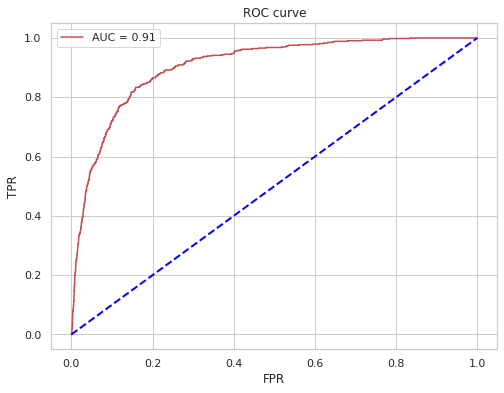

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve
#add import libraries lines in importing dependencies
#Space means run in new cell



preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
print(roc_auc_score(y_test, preds))
print(auc(fpr, tpr))

0.9054233230165435
0.9054233230165435


# Decision Tree Classifier

In [0]:
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [25, 50, 75, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced", presort = True), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=True, random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             

In [0]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'splitter': 'random'}

In [0]:
clf.best_score_

0.5671663176440346

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.580
Area under ROC on test data is : 0.815
Accuracy on test data is : 0.875


In [0]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 1, 0])

In [0]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[3566  426]
 [ 139  390]]


In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.8750276487502765


In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.9624831309041836


In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      3992
           1       0.48      0.74      0.58       529

    accuracy                           0.88      4521
   macro avg       0.72      0.82      0.75      4521
weighted avg       0.91      0.88      0.89      4521



In [0]:
from sklearn.tree import DecisionTreeClassifier
preds = tree.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# Random Forest Classifier

In [0]:
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15,30,45],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
        }
clf = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                         

In [0]:
f1_score(y_test, clf.predict(X_test))

0.6598905394839718

In [0]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 45,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 200}

In [0]:
clf.best_score_

0.6428536616980366

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random Forest", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.660
Area under ROC on test data is : 0.858
Accuracy on test data is : 0.904


In [0]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[3664  328]
 [ 107  422]]


In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.9037823490378235


In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.971625563511005


In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      3992
           1       0.56      0.80      0.66       529

    accuracy                           0.90      4521
   macro avg       0.77      0.86      0.80      4521
weighted avg       0.92      0.90      0.91      4521



In [0]:
preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# Support Vector Machine

In [0]:
params = [
            {
                "C" : [0.01, 0.1, 1.0], 
                "kernel" : ["poly"],
                "degree" : [2, 3, 4],
                "gamma" : [0.001, "auto", 0.1]
            },
            {
                "C" : [0.01, 0.1, 1.0], 
                "kernel" : ["rbf", "sigmoid"], 
                "gamma" : [0.001, "auto", 0.1]
            },
            {
                "C" : [0.01, 0.1, 1.0], 
                "kernel" : ["linear"]
            }
        ]
clf = GridSearchCV(estimator = SVC(class_weight = "balanced", max_iter = 10000, verbose = True), param_grid = params, 
                   cv = cv, n_jobs = -1, scoring = "f1", verbose = 2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 67.0min finished


[LibSVM]

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=10000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=True),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0], 'degree': [2, 3, 4],
                          'gamma': [0.001, 'auto', 0.1], 'kernel': ['poly']},
                         {'C': [0.01, 0.1, 1.0], 'gamma': [0.001, 'auto', 0.1],
                          'kernel': ['rbf', 'sigmoid']},
                         {'C': [0.01, 0.1, 1.0], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             s

In [0]:
clf.best_params_

{'C': 1.0, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}

In [0]:
clf.best_score_

0.5766806804223578

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Support Vector Machine", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.590
Area under ROC on test data is : 0.871
Accuracy on test data is : 0.855


In [0]:
testing

,Classifier,F1-Score,AUC,Accuracy


In [0]:
pred = clf.predict(X_test)
pred

array([1, 0, 0, ..., 0, 1, 0])

In [0]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[3394  598]
 [  57  472]]


In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.8551205485512055


In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.9834830483917705


In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      3992
           1       0.44      0.89      0.59       529

    accuracy                           0.86      4521
   macro avg       0.71      0.87      0.75      4521
weighted avg       0.92      0.86      0.87      4521



# PCA

In [0]:
pca = PCA()
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

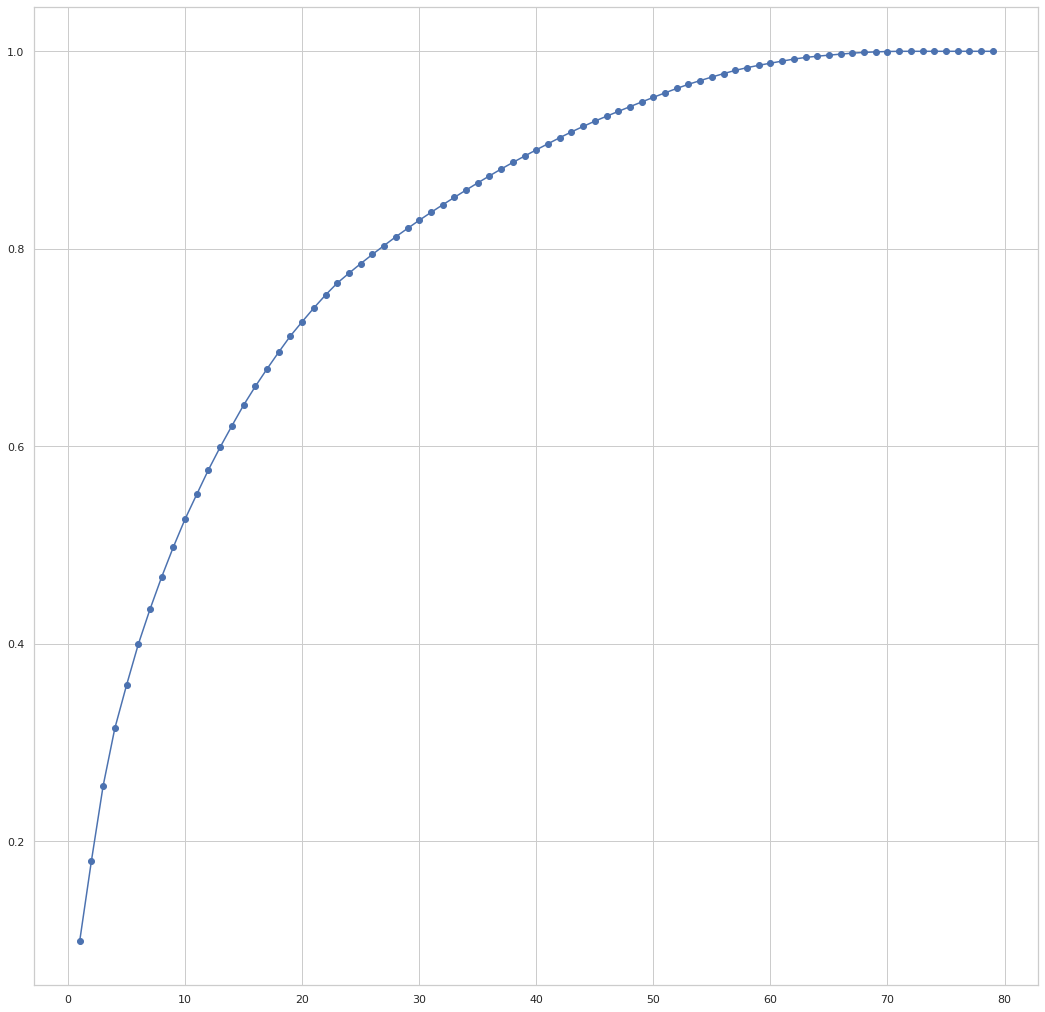

In [0]:
x = np.arange(1, len(df.columns))
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')

We can clearly see that first 40 components amount to a cumulative of 0.9 variance (for 50 it is roughly 0.95)

In [0]:
pca = PCA(n_components = 40)
pca_features = pca.fit_transform(features)

In [0]:
# DataFrame to store results
testing = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(pca_features, labels, test_size=0.2, random_state=1, stratify = labels)

# Logistic Regression

In [0]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['s

In [0]:
clf.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}

In [0]:
clf.best_score_

0.5163413217012052

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.515
Area under ROC on test data is : 0.799
Accuracy on test data is : 0.834


In [0]:
testing

,Classifier,F1-Score,AUC,Accuracy
0,Logistic Regression,0.514839,0.799221,0.833665


In [0]:
pred = clf.predict(X_test)
pred

array([1, 0, 0, ..., 0, 1, 0])

In [0]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[3370  622]
 [ 130  399]]


In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.8336651183366511


In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.9628571428571429


In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3992
           1       0.39      0.75      0.51       529

    accuracy                           0.83      4521
   macro avg       0.68      0.80      0.71      4521
weighted avg       0.90      0.83      0.85      4521



In [0]:
preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# Decision Tree Classifier

In [0]:
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [15, 20, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced", presort = True), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=True, random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             

In [0]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'best'}

In [0]:
clf.best_score_

0.494620240890198

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.492
Area under ROC on test data is : 0.770
Accuracy on test data is : 0.834


In [0]:
testing

,Classifier,F1-Score,AUC,Accuracy
0,Decision Tree,0.492203,0.770079,0.834329
1,Logistic Regression,0.514839,0.799221,0.833665


In [0]:
pred =clf.predict(X_test)
pred

array([1, 0, 0, ..., 0, 1, 0])

In [0]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[3409  583]
 [ 166  363]]


In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.8343286883432869


In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.9535664335664336


In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3992
           1       0.38      0.69      0.49       529

    accuracy                           0.83      4521
   macro avg       0.67      0.77      0.70      4521
weighted avg       0.89      0.83      0.85      4521



# Random Forest Classifier

In [0]:
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15, 25, 35],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]}
clf = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                         

In [0]:
f1_score(y_test, clf.predict(X_test))

0.5435540069686412

In [0]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 100}

In [0]:
clf.best_score_

0.5317752157753708

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random Forest", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.544
Area under ROC on test data is : 0.756
Accuracy on test data is : 0.884


In [0]:
pred =clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 1, 0])

In [0]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[3685  307]
 [ 217  312]]


In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.8840964388409643


In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

0.9443874935930292


In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3992
           1       0.50      0.59      0.54       529

    accuracy                           0.88      4521
   macro avg       0.72      0.76      0.74      4521
weighted avg       0.89      0.88      0.89      4521



# Support Vector Machine

In [0]:
params = [
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["poly"],
              "degree" : [2, 3, 4],
              "gamma" : ["auto", 0.1, 0.3]
            },
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["rbf", "sigmoid"], 
              "gamma" : ["auto", 0.1, 0.3]},
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["linear"]}
        ]
clf = GridSearchCV(estimator = SVC(class_weight = "balanced", max_iter = 5000, verbose = True), param_grid = params, 
                   cv = cv, n_jobs = -1, scoring = "f1", verbose = 2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 21.7min finished


[LibSVM]

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=5000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=True),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.3, 1.0, 3.0], 'degree': [2, 3, 4],
                          'gamma': ['auto', 0.1, 0.3], 'kernel': ['poly']},
                         {'C': [0.3, 1.0, 3.0], 'gamma': ['auto', 0.1, 0.3],
                          'kernel': ['rbf', 'sigmoid']},
                         {'C': [0.3, 1.0, 3.0], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='

In [0]:
clf.best_params_

{'C': 1.0, 'gamma': 0.3, 'kernel': 'rbf'}

In [0]:
clf.best_score_

0.5356549707389892

In [0]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Support Vector Machine", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.538
Area under ROC on test data is : 0.845
Accuracy on test data is : 0.825
F1-Score on test data is : 0.538
Area under ROC on test data is : 0.845
Accuracy on test data is : 0.825


In [0]:
testing

,Classifier,F1-Score,AUC,Accuracy
0,Support Vector Machine,0.538237,0.845172,0.825039
1,Random Forest,0.543554,0.756444,0.884096
2,Decision Tree,0.492203,0.770079,0.834329
3,Logistic Regression,0.514839,0.799221,0.833665


In [0]:
pred = clf.predict(X_test)
pred

array([1, 0, 1, ..., 0, 1, 0])

array([1, 0, 1, ..., 0, 1, 0])

In [0]:
#from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[3269  723]
 [  68  461]]


In [0]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.825038708250387


In [0]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

In [0]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      3992
           1       0.39      0.87      0.54       529

    accuracy                           0.83      4521
   macro avg       0.68      0.85      0.72      4521
weighted avg       0.91      0.83      0.85      4521



In [0]:
t1=testing

In [0]:
t1

,Classifier,F1-Score,AUC,Accuracy
0,Support Vector Machine,0.538237,0.845172,0.825039
1,Random Forest,0.543554,0.756444,0.884096
2,Decision Tree,0.492203,0.770079,0.834329
3,Logistic Regression,0.514839,0.799221,0.833665


# Conclusion

We can see from the above results that elimination techniques fail to improve the classification scores. And as for the original features, Random Forest Classifier turns out to be the best classifier in terms of F1-score and Area under ROC.

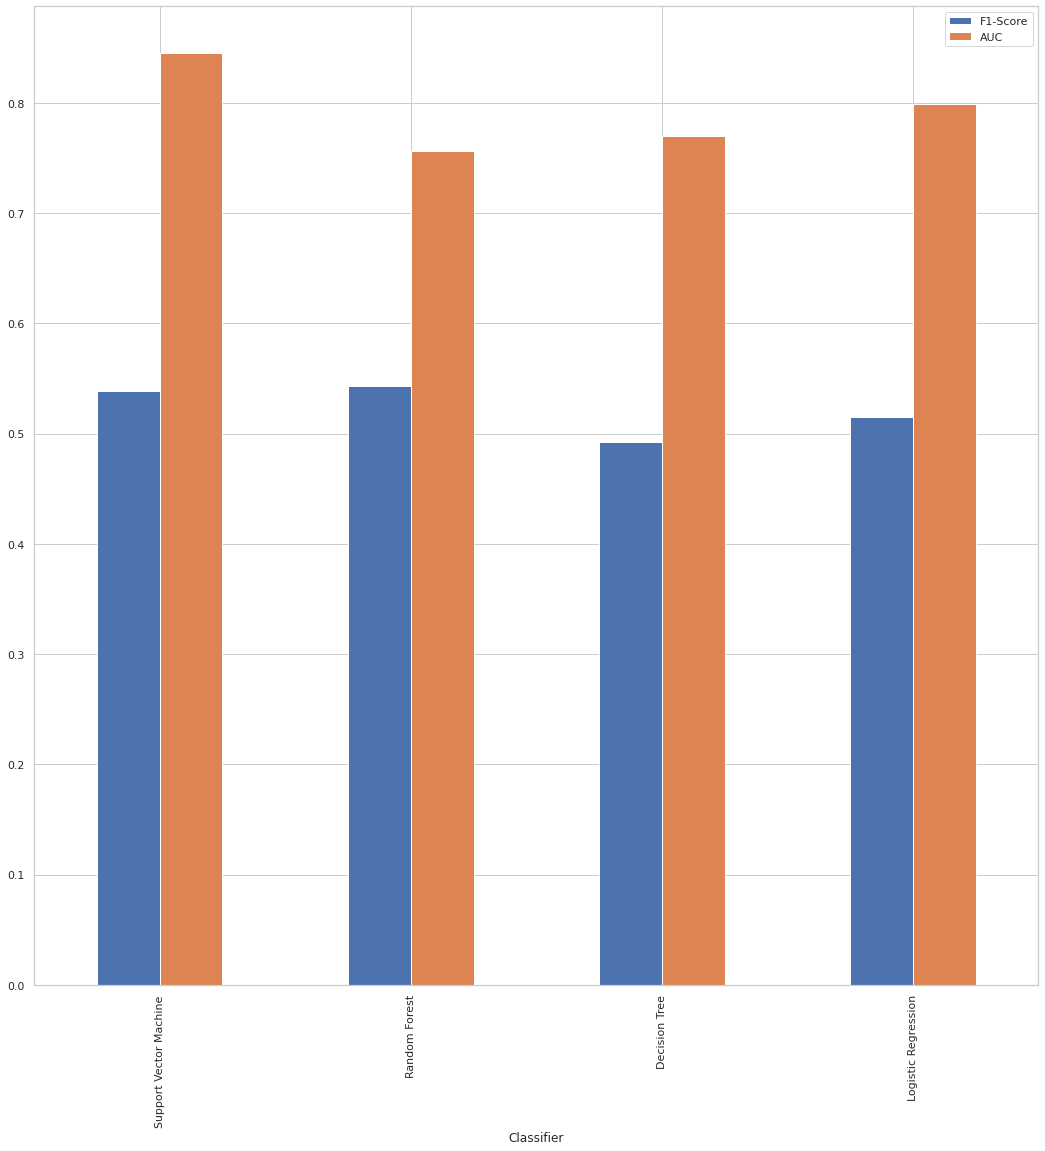

In [0]:
testing.drop(["Accuracy"], axis = 1).set_index("Classifier").plot.bar()

# Validating final model

Using the best parameters we retrain the Random Forest Classifier.